<a href="https://colab.research.google.com/github/sw-programmer/Coursework1/blob/sangwoo/CW1_Q3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  **Coursework 1**

1.   ### **Computationally Efficient Eigenfaces**
2.   ### **Incremental PCA**
3.   ### **PCA-LDA for Face Recognition**
4.   ### **K-means codebook**
5.   ### **RF classifier**


**by 20190223	Soohyun Ryu,	20190247	Sangwoo Park**






**1. Setting!**

In [2]:
import os
import time
# import torch
# import torch.nn as nn
# import torchvision.transforms as transforms
# import matplotlib.pyplot as plt
# import datetime
# import math
# import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import io
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
mat_file = io.loadmat("/content/drive/MyDrive/CV_ML/CW1/face.mat")
mat_X = mat_file['X']
mat_Y = mat_file['l'][0]

print(mat_file.keys()) 
print(mat_X.shape)                         # 총 52명. 각 10장의 사진. 

dict_keys(['__header__', '__version__', '__globals__', 'X', 'l'])
(2576, 520)


In [5]:
df = pd.DataFrame(data=mat_X).transpose()
df['label'] = mat_Y                         # row -> data, col -> feature
X = df.iloc[:, :-1].values
Y = df.iloc[:, -1].values                   # Target column

X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    Y, 
                                                    test_size=0.2, 
                                                    shuffle=True,
                                                    stratify=Y, 
                                                    random_state=1004)          
# 얼굴 그룹 비율 유지               
# test/train ratio = 0.2
# random_state -> before dividing, seed for shuffling
print('X_train shape:', X_train.shape)
print('X_test shape:', X_test.shape)
print('y_train shape:', y_train.shape)
print('y_test shape:', y_test.shape)
X_test_mean = np.mean(X_test, axis = 0)
X_train_mean = np.mean(X_train, axis = 0)
np.unique(y_train, return_counts=True)    # 52명의 얼굴이 80%씩 고르게 train set에 들어간 모습

X_train shape: (416, 2576)
X_test shape: (104, 2576)
y_train shape: (416,)
y_test shape: (104,)


(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
        35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51,
        52], dtype=uint8),
 array([8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8, 8,
        8, 8, 8, 8, 8, 8, 8, 8]))

In [6]:
# NN Classfication
def NN(X_trained, X_test, y_pred):
  for query in X_test:
    Args = []
    for trained in X_trained:
      Args.append(np.linalg.norm(query - trained))
    y_pred.append(y_train[np.argmin(Args)])
  return accuracy_score(y_test, y_pred), y_pred

# 평균 얼굴 계산 함수 
def AvgCompute(X): 
  Xbar = np.mean(X, axis=0)  
  matrix_A = X - Xbar 
  return matrix_A, Xbar

# 고유값, 고유벡터 계산 함수
def eig(S): 
  eig_vals, eig_vecs = np.linalg.eig(S) 
  sort_indices = np.argsort(eig_vals)[::-1] # 내림차순 정렬 
  return eig_vals[sort_indices], eig_vecs[:, sort_indices]

# Reconstruction에 쓰일 함수
def reconstruct(X, PC): 
  return (X @ PC) @ PC.T

# PCA 과정
def PCA(X, num_components, low_dim = False): # X == train set, num_components == 선택할 eigen vector 개수
  start = time.time()
  N, D = X.shape 
  matrix_A, X_bar = AvgCompute(X)
  if not low_dim:
    S = (matrix_A.T @ matrix_A) / N
  else:
    S = (matrix_A @ matrix_A.T) / N

  eig_vals, eig_vecs = eig(S)
  principal_vals, principal_components = np.real(eig_vals[:num_components]), np.real(eig_vecs[:,:num_components]) 
  
  if low_dim:
    norm = np.linalg.norm(matrix_A.T @ principal_components, axis = 0)
    principal_components = ((matrix_A.T @ principal_components) / norm[np.newaxis, :])

  reconst_X = reconstruct(matrix_A, principal_components) + X_bar 
  comp_time = time.time() - start
  
  return reconst_X, X_bar, principal_vals, principal_components, comp_time

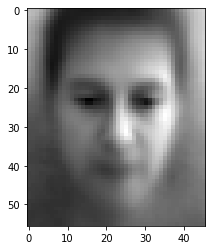

In [7]:
A, X_bar = AvgCompute(X_train) 
A = A.T

plt.imshow(np.reshape(X_bar,(46,56)).T, cmap = 'gist_gray') # 평균 얼굴 출력

## PCA Method


13/91
14/91
15/91
16/91
17/91
18/91
19/91
20/91
21/91
22/91
23/91
24/91
25/91
26/91
27/91
28/91
29/91
30/91
31/91
32/91
33/91
34/91
35/91
36/91
37/91
38/91
39/91
40/91
41/91
42/91
43/91
44/91
45/91
46/91
47/91
48/91
49/91
50/91
51/91
52/91
53/91
54/91
55/91
56/91
57/91
58/91
59/91
60/91
61/91
62/91
63/91
64/91
65/91
66/91
67/91
68/91
69/91
70/91
71/91
72/91
73/91
74/91
75/91
76/91
77/91
78/91
79/91
80/91
81/91
82/91
83/91
84/91
85/91
86/91
87/91
88/91
89/91
90/91
91/91


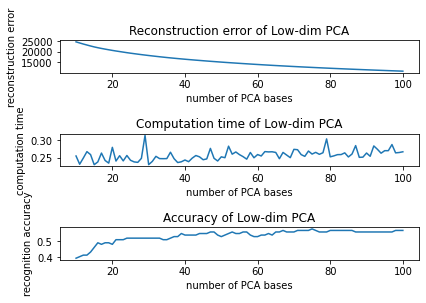

average computation time = 0.2571176618010133


In [8]:
# number of PCA bases 바꾸면서 reconstruction error 측정
max_num = 100
start_num = 10
error_list = []
computation_time = []
accuracy = []

os.makedirs("./PCA_org", exist_ok=True)
os.makedirs("./PCA_low_dim", exist_ok=True)

# Original PCA / Low-dim PCA
low_dim=True
# low_dim=True
if low_dim:
    root_path = "./PCA_low_dim"
else:
    root_path = "./PCA_org"

for i in range(start_num, max_num+1):
    reconst_X, X_bar, principal_vals, principal_components, comp_time = PCA(X_train, i, low_dim)
    recon_loss = np.linalg.norm((X_train - reconst_X), None)
    error_list.append(recon_loss)
    acc, y_predd = NN((X_train - X_bar) @ principal_components, (X_test - X_test_mean) @ principal_components, [])
    accuracy.append(acc)
    computation_time.append(comp_time)
    # To see the reconstructed images
    plt.imsave(f"{root_path}/{i}_recon.png", np.reshape(reconst_X[0,:],(46,56)).T, cmap = 'gist_gray')
    print(f"{i-start_num+1}/{max_num-start_num+1}")

if not low_dim:
    PCA_name = "Original PCA"
else:
    PCA_name = "Low-dim PCA"

x_axis = list(range(start_num, max_num+1))
fig_recon, ax_recon = plt.subplots(3,1)
ax_recon[0].plot(x_axis, error_list)
ax_recon[0].set_xlabel("number of PCA bases")
ax_recon[0].set_ylabel("reconstruction error")
ax_recon[0].set_title(f"Reconstruction error of {PCA_name}")

ax_recon[1].plot(x_axis, computation_time)
ax_recon[1].set_xlabel("number of PCA bases")
ax_recon[1].set_ylabel("computation time")
ax_recon[1].set_title(f"Computation time of {PCA_name}")

ax_recon[2].plot(x_axis, accuracy)
ax_recon[2].set_xlabel("number of PCA bases")
ax_recon[2].set_ylabel("recognition accuracy")
ax_recon[2].set_title(f"Accuracy of {PCA_name}")

fig_recon.tight_layout(pad=1.0)

plt.show()

print(f"average computation time = {np.mean(computation_time)}")

In [9]:
print(principal_components.shape)

(2576, 100)


## PCA-LDA Method

In [43]:
def LDA(X, pc, num_lda): 
  sort_indices = np.argsort(y_train)
  undo_indices = np.argsort(sort_indices)
  y_train_sorted = y_train[sort_indices]
  X_train_sorted = X_train[sort_indices]

  meanlist = []
  j = 0
  for i in range(52):
    mean = np.mean(X_train_sorted[j:j+8,:], axis=0)
    meanlist.append(mean)
    j = j+8  

  start = time.time()
  # Between class scatter matrix
  mean_global = np.mean(meanlist, axis = 0)
  meanlist_sub = np.array([(i-mean_global) for i in meanlist])
  S_bet = 8 * meanlist_sub.T @ meanlist_sub

  # Within class scatter matrix
  within_sub = []
  j=0
  for i in range(52):
    within_sub.append(np.subtract(X_train_sorted[j:j+8,:], meanlist[i]))
    j = j+8
  within_sub = np.array([(i.T @ i) for i in within_sub])
  S_with = np.sum(within_sub, axis = 0)

  if(np.linalg.matrix_rank(pc) < pc.shape[1]):
    pc = np.unique(pc, axis=1)
    print(f"rank of Sw is {np.linalg.matrix_rank(pc)}")
  else:
    pass

  # 1. PCA
  S_bet_PCA = pc.T @ S_bet @ pc
  S_with_PCA = pc.T @ S_with @ pc

  # 2. LDA
  discriminant_vals, discriminant_components = eig((np.linalg.inv(S_with_PCA) @ S_bet_PCA))
  discriminant_vals, discriminant_components = np.real(discriminant_vals[:num_lda]), np.real(discriminant_components[:,:num_lda]) 
  
  comp_time = time.time() - start

  return discriminant_components, discriminant_vals, pc, comp_time


def PCA_LDA(X, num_pca, num_lda):
  reconst_X, X_bar, principal_vals, principal_components, comp_time = PCA(X, num_pca, True)
  return LDA(X, principal_components, num_lda)

(2576, 300)
300
(300, 300)
PCA-LDA computation time = 4.408256530761719


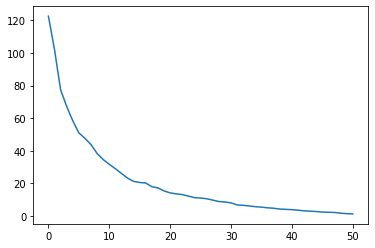

In [22]:
discriminant_components, discriminant_vals, principal_components_lda, comp_time = PCA_LDA(X_train, 300, 51)   # max(discriminant_components) = 416-52, max(discriminant_vals) = 52-1

x_axis = list(range(0, 51))
plt.plot(x_axis, discriminant_vals)
ax_recon[0].set_title(f"Eigen value of PCA-LDA")
print(f"PCA-LDA computation time = {comp_time}")

In [12]:
X_train_pca = (X_train - X_bar) @ principal_components_lda
X_test_pca = (X_test - X_test_mean) @ principal_components_lda
print(X_train_pca.shape)
print(discriminant_components.shape)
result, y_pred = NN(X_train_pca @ discriminant_components, X_test_pca @ discriminant_components, [])
print(result)

(416, 300)
(300, 51)
0.8942307692307693


In [13]:
### ST = SB + SW 임을 보일 수 있어야 한다. With using rank

In [14]:
### Confushion Matrix

In [15]:
### Time/Memory
import psutil

def memory_usage(message: str = 'debug'):
    # current process RAM usage
    p = psutil.Process()
    rss = p.memory_info().rss / 2 ** 20 # Bytes to MB
    print(f"[{message}] memory usage: {rss: 10.5f} MB")

## PCA-LDA Ensemble

In [37]:
from collections import Counter
# PCA first
reconst_X, X_bar, principal_vals, principal_components, comp_time = PCA(X_train, 415, True) 

def PCA_LDA_ensemble(X, T, M0, M1, Mlda): 
  # Randim Subspaces
  pc_M0 = principal_components[:,:M0]
  pc_M1_origin = principal_components[:,M0:]

  scorelist = []
  predictlist = []
  for i in range(T):
    idx = np.random.randint(415-M0, size=M1)
    pc_M1 = pc_M1_origin[:,idx]
    pc_Mpca = np.concatenate((pc_M0, pc_M1), axis=1)
    discriminant_components, discriminant_vals, pc, comp_time = LDA(X, pc_Mpca, Mlda) 

    X_train_pca = (X - X_bar) @ pc  
    X_test_pca = (X_test - X_test_mean) @ pc
    score, y_pred = NN(X_train_pca @ discriminant_components, X_test_pca @ discriminant_components, [])
    scorelist.append(score)
    predictlist.append(y_pred)

  # majority vote
  predictlist = np.array(predictlist)
  y_pred_voted = []
  for i in range(len(X_test)):
    candidate = predictlist[:,i]
    c = Counter(candidate)
    y_pred_voted.append(c.most_common(1)[0][0])

  avgError_individual = np.sum(np.square(scorelist))/T  
  Error_committee = accuracy_score(y_test, y_pred_voted)

  return Error_committee, avgError_individual

In [44]:
err_committee, err_individual = PCA_LDA_ensemble(X_train, 10, 150, 150, 51)

print(err_individual)
print(err_committee)

rank of Sw is 262
rank of Sw is 270
rank of Sw is 267
rank of Sw is 265
rank of Sw is 261
rank of Sw is 253
rank of Sw is 272
rank of Sw is 262
rank of Sw is 269
rank of Sw is 267
(10, 104)
0.8398576183431953
0.9615384615384616
